In [199]:
from python.utility.vrep import vrep
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
from skimage import draw, measure, data, color

In [200]:
# plt.figure(figsize=(15,8))
# plt.subplot(121)
# plt.imshow(data.astronaut())
# plt.subplot(122)

# # img_h = color.rgb2hsv(data.astronaut())[...,0]<0.01

# img_h = color.rgb2hsv(data.astronaut())[...,2] > 0.5

# plt.imshow(img_h)
# plt.show()

In [201]:
print ('Program started')
vrep.simxFinish(-1) # just in case, close all opened connections
clientID = vrep.simxStart('127.0.0.1',19999,True,True,5000,5)

Program started


Connected to remote API server
Vision Sensor object handling
Getting first image
Stop!
Stop!
Stop!
Stop!
Stop!
Stop!
Stop!


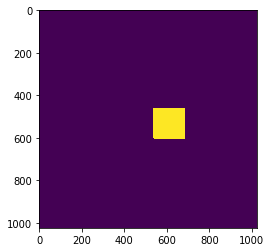

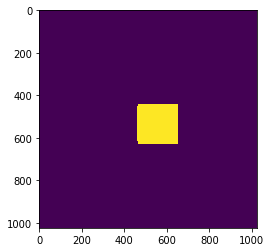

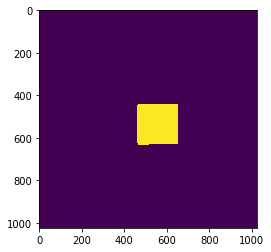

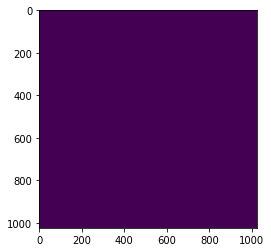

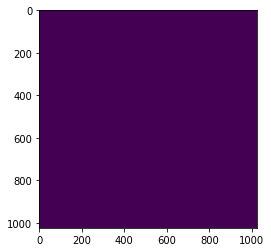

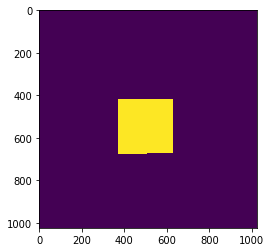

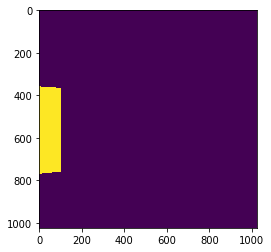

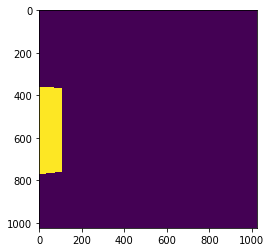

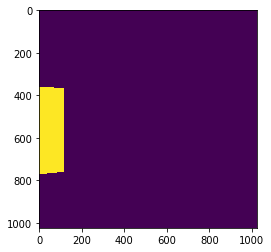

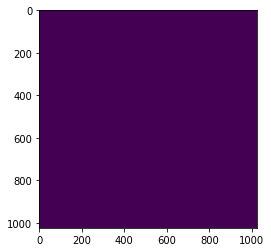

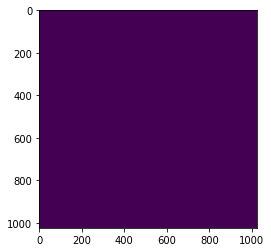

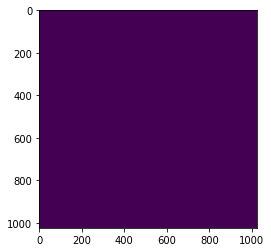

In [202]:
if clientID!=-1:
    print('Connected to remote API server')
    print('Vision Sensor object handling')
    res, v1 = vrep.simxGetObjectHandle(clientID, 'camera', vrep.simx_opmode_oneshot_wait)
    print('Getting first image')
    err, resolution, image = vrep.simxGetVisionSensorImage(clientID, v1, 0, vrep.simx_opmode_streaming)
    while (vrep.simxGetConnectionId(clientID) != -1):
        err, resolution, image = vrep.simxGetVisionSensorImage(clientID, v1, 0, vrep.simx_opmode_buffer)
        if err == vrep.simx_return_ok:
        	# print("image OK!!!")
        	img = np.array(image,dtype=np.uint8)
        	img.resize([resolution[1],resolution[0],3])

        	img_b_r = color.rgb2hsv(img)[...,2] > 0.9
        	img_c_r = color.rgb2hsv(img)[...,0] < 0.001

        	img_e = img_b_r & img_c_r

        	image_label = measure.label(img_e)

        	max = 0

        	for reg in measure.regionprops(image_label):
        		if reg.area > max:
        			max = reg.area
            
        	if max > 20000:
        		print("Stop!")
        		vrep.simxSetIntegerSignal(clientID, "stop", 1, vrep.simx_opmode_streaming)
        	else:
        		vrep.simxSetIntegerSignal(clientID, "stop", 0, vrep.simx_opmode_streaming)
        	plt.imshow(img_e)
        	plt.show()

        # elif err == sim.simx_return_novalue_flag:
        # 	# print("no image yet")
        # 	pass
        # else:
        # 	print("Err = ", err)
else:
	print("Failed to connect to remote API Server")
	vrep.simxFinish(clientID)